# Modelo predictivo de compra de clientes

## Información del proyecto

**Rol:** Ingeniera de Inteligencia Artificial  
**Tipo de modelo:** Clasificación binaria (predicción de compra)  
**Objetivo:** Predecir si un cliente realizará una compra (1) o no (0).  

**Requerimiento del cliente:**  
El modelo debe alcanzar una **precisión mínima del 95 %**, entendida como la proporción de
predicciones positivas correctas sobre el total de predicciones positivas realizadas por el modelo.

**Métrica principal de evaluación:**  
Precisión (Precision)

**Herramientas:**  
Google Colab, Python, scikit-learn


In [41]:
import os

os.listdir()

['.config',
 '.ipynb_checkpoints',
 'dataset_IA_alta_precision.csv',
 'sample_data']

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    roc_curve, auc
)

from sklearn.ensemble import RandomForestClassifier

# Balanceo de clases
from imblearn.over_sampling import SMOTE


In [43]:
# Paleta Modern Fusion (equivalente a tidyverse)
mi_paleta = [
    "#6C5CE7",  # Violeta profundo
    "#00CEC9",  # Turquesa eléctrico
    "#FF7675",  # Coral
    "#0984E3",  # Azul acero
    "#55E6C1",  # Lima suave
    "#FD79A8",  # Rosa malva
    "#2D3436",  # Gris carbono
    "#DFE6E9"   # Arena
]

sns.set_palette(mi_paleta)
plt.rcParams["figure.figsize"] = (8, 5)

##Cargar el CSV

In [64]:
# Carga del dataset parcial
df = pd.read_csv('dataset.csv')

# Vista rápida
df.head()

,Churned,Country,Gender,z_Age,z_Login_Frequency,z_Cart_Abandonment_Rate,z_Total_Purchases,z_Product_Reviews_Written,z_Social_Media_Engagement_Score,z_Mobile_App_Usage,z_Credit_Balance,Digital_Score
0,0,3,2,0.468918,0.304115,-0.397966,-0.587640,0.534646,-0.665647,0.168428,0.276392,-0.248610
1,0,7,2,-0.157141,0.432145,-1.190217,0.911237,0.091479,-0.080416,0.448105,0.925216,0.183844
2,0,2,1,0.647791,-0.208006,0.848754,-0.573365,-0.794857,-0.080416,-1.174023,0.310131,-0.627220
3,0,8,1,1.631597,-0.208006,-0.944558,0.268861,0.977814,2.938959,1.309511,0.618971,2.124235
4,0,5,2,-0.246577,2.224568,-2.332532,2.766989,3.636820,2.788767,3.479806,2.937434,3.134286


In [65]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Churned                          50000 non-null  int64  
 1   Country                          50000 non-null  int64  
 2   Gender                           50000 non-null  int64  
 3   z_Age                            50000 non-null  float64
 4   z_Login_Frequency                50000 non-null  float64
 5   z_Cart_Abandonment_Rate          50000 non-null  float64
 6   z_Total_Purchases                50000 non-null  float64
 7   z_Product_Reviews_Written        50000 non-null  float64
 8   z_Social_Media_Engagement_Score  50000 non-null  float64
 9   z_Mobile_App_Usage               50000 non-null  float64
 10  z_Credit_Balance                 50000 non-null  float64
 11  Digital_Score                    50000 non-null  float64
dtypes: float64(9), int

Index(['Churned', 'Country', 'Gender', 'z_Age', 'z_Login_Frequency',
       'z_Cart_Abandonment_Rate', 'z_Total_Purchases',
       'z_Product_Reviews_Written', 'z_Social_Media_Engagement_Score',
       'z_Mobile_App_Usage', 'z_Credit_Balance', 'Digital_Score'],
      dtype='object')

# Definición de la variable objetivo

El dataset no contiene una variable directa de compra.
Se utiliza la variable **Churned** para inferir el comportamiento de compra.

- Churned = 0 → Cliente activo (sí compra)
- Churned = 1 → Cliente abandonó (no compra)

Se crea una nueva variable llamada **Purchase** alineada con el objetivo del negocio.

In [66]:
df["Purchase"] = 1 - df["Churned"]


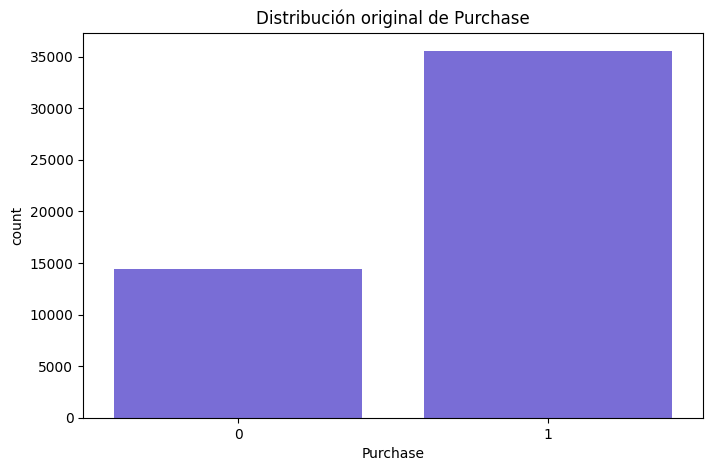

,proportion
Purchase,
1,0.711
0,0.289


In [67]:
sns.countplot(x="Purchase", data=df)
plt.title("Distribución original de Purchase")
plt.show()

df["Purchase"].value_counts(normalize=True)

In [55]:
# Probabilidad de la clase positiva (Purchase = 1)
y_prob_base = model_base.predict_proba(X_test)[:, 1]

thresholds = [0.6, 0.7, 0.8, 0.9]
for t in thresholds:
    y_pred_thr = (y_prob_base >= t).astype(int)
    print(
        f"Umbral: {t} | "
        f"Precisión: {precision_score(y_test, y_pred_thr):.3f} | "
        f"Recall: {recall_score(y_test, y_pred_thr):.3f}"
    )

Umbral: 0.6 | Precisión: 0.800 | Recall: 0.851
Umbral: 0.7 | Precisión: 0.826 | Recall: 0.734
Umbral: 0.8 | Precisión: 0.845 | Recall: 0.499
Umbral: 0.9 | Precisión: 0.888 | Recall: 0.117


In [56]:
importances = pd.Series(
    model_base.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(15)

,0
z_Cart_Abandonment_Rate,0.184136
Digital_Score,0.121422
z_Age,0.107895
z_Mobile_App_Usage,0.103133
z_Total_Purchases,0.102093
z_Credit_Balance,0.099854
z_Social_Media_Engagement_Score,0.089674
z_Login_Frequency,0.077828
z_Product_Reviews_Written,0.049530
Country,0.045410


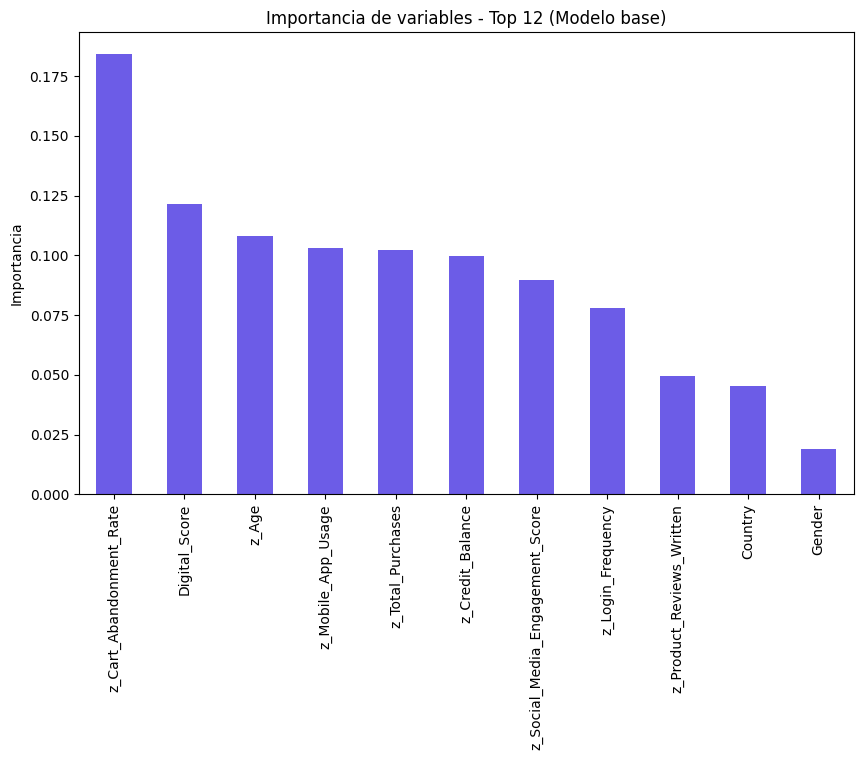

In [57]:
plt.figure(figsize=(10, 6))
importances.head(12).plot(kind="bar", color=mi_paleta[0])
plt.title("Importancia de variables - Top 12 (Modelo base)")
plt.ylabel("Importancia")
plt.show()

In [58]:
# Variables con baja importancia que introducen ruido según el modelo
variables_a_eliminar = [
    "Gender",
    "Country",
    "z_Product_Reviews_Written"
]

# Construcción del nuevo conjunto de variables predictoras
X_reduced = df.drop(
    columns=variables_a_eliminar + ["Purchase", "Churned"]
)

# Codificación de variables categóricas restantes
X_reduced = pd.get_dummies(X_reduced, drop_first=True)

# Variable objetivo
y_reduced = df["Purchase"]


In [59]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reduced,
    y_reduced,
    test_size=0.2,
    random_state=42,
    stratify=y_reduced
)


In [60]:
model_reduced = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

model_reduced.fit(Xr_train, yr_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [61]:
yr_pred = model_reduced.predict(Xr_test)

precision_red = precision_score(yr_test, yr_pred)
recall_red = recall_score(yr_test, yr_pred)
f1_red = f1_score(yr_test, yr_pred)

print("Modelo reducido")
print("Precisión:", precision_red)
print("Recall:", recall_red)
print("F1-score:", f1_red)

print("\nReporte de clasificación:")
print(classification_report(yr_test, yr_pred))


Modelo reducido
Precisión: 0.78086603841107
Recall: 0.920675105485232
F1-score: 0.8450267862905828

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.65      0.36      0.47      2890
           1       0.78      0.92      0.85      7110

    accuracy                           0.76     10000
   macro avg       0.72      0.64      0.66     10000
weighted avg       0.74      0.76      0.74     10000



In [62]:
# Probabilidades estimadas por el modelo reducido
yr_prob = model_reduced.predict_proba(Xr_test)[:, 1]

thresholds = [0.6, 0.7, 0.8, 0.9]

for t in thresholds:
    yr_pred_thr = (yr_prob >= t).astype(int)
    print(
        f"Umbral: {t} | "
        f"Precisión: {precision_score(yr_test, yr_pred_thr):.3f} | "
        f"Recall: {recall_score(yr_test, yr_pred_thr):.3f}"
    )


Umbral: 0.6 | Precisión: 0.802 | Recall: 0.850
Umbral: 0.7 | Precisión: 0.824 | Recall: 0.736
Umbral: 0.8 | Precisión: 0.848 | Recall: 0.518
Umbral: 0.9 | Precisión: 0.870 | Recall: 0.121
